# LIMPIEZA DE DATOS

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import pylab as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [2]:
salaries = pd.read_csv('../data/salaries_data.csv')
salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,140250,USD,140250,US,100,US,M
1,2022,SE,FT,Data Engineer,135000,USD,135000,US,100,US,M
2,2021,MI,FT,BI Data Analyst,100000,USD,100000,US,100,US,M
3,2021,MI,CT,ML Engineer,270000,USD,270000,US,100,US,L
4,2021,MI,FT,Data Engineer,22000,EUR,26005,RO,0,US,L


In [3]:
salaries.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           500 non-null    int64 
 1   experience_level    500 non-null    object
 2   employment_type     500 non-null    object
 3   job_title           500 non-null    object
 4   salary              500 non-null    int64 
 5   salary_currency     500 non-null    object
 6   salary_in_usd       500 non-null    int64 
 7   employee_residence  500 non-null    object
 8   remote_ratio        500 non-null    int64 
 9   company_location    500 non-null    object
 10  company_size        500 non-null    object
dtypes: int64(4), object(7)
memory usage: 224.3 KB


In [4]:
salaries.describe(include='all').T #Hay OUTLIERS

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
work_year,500.0,NaN,NaN,NaN,2021.414,0.683768,2020.0,2021.0,2022.0,2022.0,2022.0
experience_level,500,4,SE,243,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment_type,500,4,FT,484,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_title,500,48,Data Scientist,121,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,500.0,NaN,NaN,NaN,334216.446,1626525.678661,4000.0,70000.0,114000.0,160080.0,30400000.0
salary_currency,500,15,USD,329,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary_in_usd,500.0,NaN,NaN,NaN,112996.216,69613.750601,2859.0,64594.5,103080.0,150000.0,450000.0
employee_residence,500,49,US,278,NaN,NaN,NaN,NaN,NaN,NaN,NaN
remote_ratio,500.0,NaN,NaN,NaN,71.8,40.472658,0.0,50.0,100.0,100.0,100.0
company_location,500,43,US,296,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
salaries.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [6]:
def unique_values(df):
    for e in df.columns:
        print(df[e].unique())
unique_values(salaries)

[2022 2021 2020]
['SE' 'MI' 'EN' 'EX']
['FT' 'CT' 'FL' 'PT']
['Data Engineer' 'BI Data Analyst' 'ML Engineer'
 'Machine Learning Scientist' 'Data Scientist' 'Data Analyst'
 'Machine Learning Engineer' 'Principal Data Scientist'
 'Data Engineering Manager' 'Data Analytics Manager' 'Big Data Engineer'
 'Research Scientist' 'Machine Learning Developer'
 'Computer Vision Engineer' 'AI Scientist' 'Machine Learning Manager'
 'Lead Data Scientist' 'Director of Data Science'
 '3D Computer Vision Researcher' 'Data Specialist'
 'Applied Data Scientist' 'Data Science Engineer' 'Head of Data'
 'Analytics Engineer' 'ETL Developer' 'Marketing Data Analyst'
 'Data Architect' 'Data Science Consultant' 'Principal Data Analyst'
 'Head of Data Science' 'Lead Data Engineer' 'Data Science Manager'
 'Applied Machine Learning Scientist' 'Lead Data Analyst'
 'Cloud Data Engineer' 'Lead Machine Learning Engineer'
 'Machine Learning Infrastructure Engineer' 'Big Data Architect'
 'Product Data Analyst' 'Business

In [8]:
pd.DataFrame({'': salaries.nunique().index , 'unique_values':  salaries.nunique().values})

,,unique_values
0,work_year,3
1,experience_level,4
2,employment_type,4
3,job_title,48
4,salary,237
5,salary_currency,15
6,salary_in_usd,312
7,employee_residence,49
8,remote_ratio,3
9,company_location,43


In [9]:
cols = ['work_year', 'experience_level', 'employment_type', 'job_title', 'salary_currency', 
        'employee_residence', 'company_location', 'company_size']

In [10]:
for e in cols:
    d = {}
    u = list(salaries[e].unique())
    for i, x in enumerate(u):
        d[x] = i
    salaries[e]=salaries[e].apply(lambda x: d[x])
salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,0,0,0,140250,0,140250,0,100,0,0
1,0,0,0,0,135000,0,135000,0,100,0,0
2,1,1,0,1,100000,0,100000,0,100,0,0
3,1,1,1,2,270000,0,270000,0,100,0,1
4,1,1,0,0,22000,1,26005,1,0,0,1


In [11]:
salaries.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,500.0,0.586,6.837683e-01,0.0,0.0,0.0,1.0,2.0
experience_level,500.0,0.724,8.373927e-01,0.0,0.0,1.0,1.0,3.0
employment_type,500.0,0.072,4.232899e-01,0.0,0.0,0.0,0.0,3.0
job_title,500.0,8.360,1.049928e+01,0.0,3.0,4.5,9.0,47.0
salary,500.0,334216.446,1.626526e+06,4000.0,70000.0,114000.0,160080.0,30400000.0
salary_currency,500.0,0.922,1.964595e+00,0.0,0.0,0.0,1.0,14.0
salary_in_usd,500.0,112996.216,6.961375e+04,2859.0,64594.5,103080.0,150000.0,450000.0
employee_residence,500.0,5.998,1.032954e+01,0.0,0.0,0.0,7.0,48.0
remote_ratio,500.0,71.800,4.047266e+01,0.0,50.0,100.0,100.0,100.0
company_location,500.0,5.000,8.974915e+00,0.0,0.0,0.0,7.0,42.0


In [12]:
salaries.duplicated().sum()

34

In [13]:
salaries.iloc[:, -1]

0      0
1      0
2      0
3      1
4      1
      ..
495    0
496    1
497    0
498    1
499    0
Name: company_size, Length: 500, dtype: int64

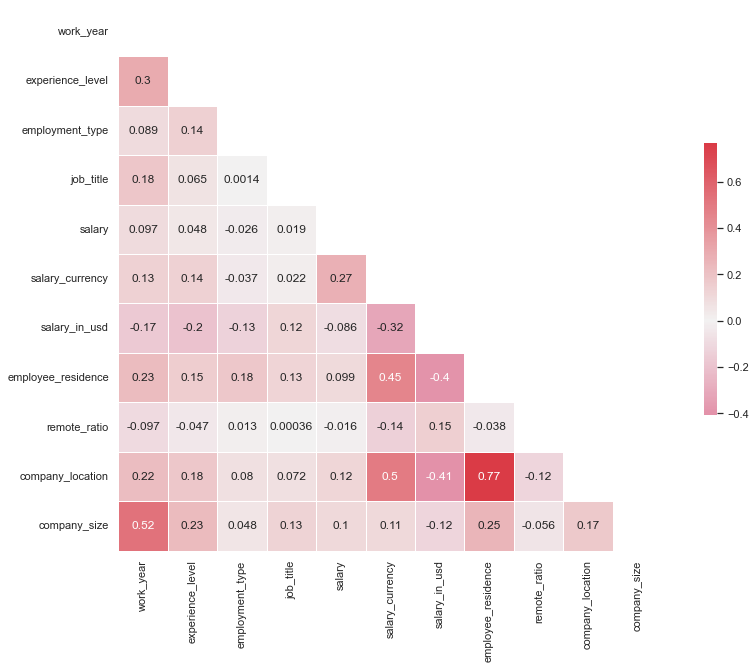

In [14]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(salaries.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(salaries.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

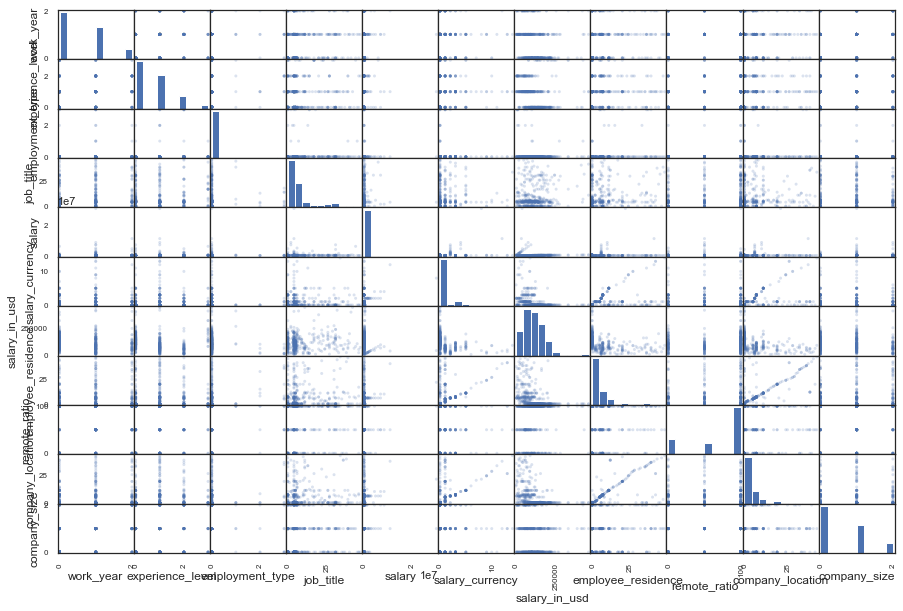

In [15]:
pd.plotting.scatter_matrix(salaries, figsize=(15, 10), alpha=0.2);

In [16]:
X = salaries.drop(columns=['salary','salary_in_usd'], axis=1)

y = salaries.salary_in_usd

X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, test_size=0.2, random_state=22)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

linreg=LinReg()
logreg=LogReg()
dtr=DTR()
rfr=RFR()
#tsne=TSNE()

modelos=[linreg, logreg, dtr, rfr]

for m in modelos:
    m.fit(X_train, y_train)

y_pred_linreg = linreg.predict(X_test)
y_pred_logreg = logreg.predict(X_test)
y_pred_dtr = dtr.predict(X_test)
y_pred_rfr = rfr.predict(X_test)
#y_pred_tsne = tsne.predict(X_test)

y_pred_linreg[:10], y_pred_logreg[:10], y_pred_dtr[:10], y_pred_rfr[:10]

(400, 9) (100, 9) (400,) (100,)


(array([122787.10004413, 127775.33123016, 143695.15537761,  74939.27118392,
        138318.95251724, 152314.96556945, 173514.3057501 , 123346.12230705,
         62396.41364806,  87525.47935113]),
 array([209100, 276000, 140000, 100000, 155000, 276000, 170000,  80000,
         64849,  89294], dtype=int64),
 array([128400.  , 189650.  , 162345.  ,  37825.  , 136296.36, 276000.  ,
        241000.  ,  70139.  ,   4000.  ,  45807.  ]),
 array([128091.46392496, 187923.71119048, 163210.44948086,  43220.09375   ,
        137803.48062586, 275980.57666667, 204405.51669048,  85194.453     ,
         52363.51666667,  48753.84608333]))

In [17]:
linreg.score(X, y), logreg.score(X, y), dtr.score(X, y), rfr.score(X, y)

(0.2524405170331726, 0.162, 0.8160510267251617, 0.7919808945406748)

In [18]:
test = pd.read_csv('../data/testeo.csv')
test.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,2020,SE,FT,Machine Learning Scientist,260000,USD,JP,0,JP,S
1,2020,MI,FT,Lead Data Analyst,87000,USD,US,100,US,L
2,2020,MI,FT,Data Analyst,85000,USD,US,100,US,L
3,2020,MI,FT,Machine Learning Engineer,299000,CNY,CN,0,CN,M
4,2020,MI,FT,Product Data Analyst,450000,INR,IN,100,IN,L


In [19]:
cols = ['work_year', 'experience_level', 'employment_type', 'job_title', 'salary_currency', 
        'employee_residence', 'company_location', 'company_size']
for e in cols:
    d = {}
    u = list(test[e].unique())
    for i, x in enumerate(u):
        d[x] = i
    test[e]=test[e].apply(lambda x: d[x])
test.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,0,0,0,0,260000,0,0,0,0,0
1,0,1,0,1,87000,0,1,100,1,1
2,0,1,0,2,85000,0,1,100,1,1
3,0,1,0,3,299000,1,2,0,2,2
4,0,1,0,4,450000,2,3,100,3,1


In [22]:
test = test.drop(['salary'], axis=1)
test.head()

,work_year,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,1,100,1,1
2,0,1,0,2,0,1,100,1,1
3,0,1,0,3,1,2,0,2,2
4,0,1,0,4,2,3,100,3,1


In [23]:
X = salaries.drop(columns = ['salary','salary_in_usd'])

y = salaries.salary_in_usd

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.01, random_state=22)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

linreg=LinReg()
logreg=LogReg()
dtr=DTR()
rfr=RFR()
#tsne=TSNE()

modelos=[linreg, logreg, dtr, rfr]

for m in modelos:
    m.fit(X_train, y_train)

y_pred_linreg = linreg.predict(test)
y_pred_logreg = logreg.predict(test)
y_pred_dtr = dtr.predict(test)
y_pred_rfr = rfr.predict(test)
#y_pred_tsne = tsne.predict(X_test)

y_pred_linreg[:10], y_pred_logreg[:10], y_pred_dtr[:10], y_pred_rfr[:10]

(495, 9) (5, 9) (495,) (5,)


(array([119749.15395202, 128259.21890099, 129401.79263856, 109039.39476529,
        117464.89833253, 101610.04507037, 118898.32247283,  91433.45689125,
        124056.53741175, 141385.16923416]),
 array([140400, 120000, 120000, 141846, 120000,  65438, 160000,  52351,
        100000, 120000], dtype=int64),
 array([132535.71428571,  68147.        ,  87932.        ,  55622.5       ,
         21983.        , 162674.        ,  24342.        ,  55622.5       ,
         20000.        ,  53192.        ]),
 array([130752.16151598,  91202.82166667,  89218.764     ,  49851.39180952,
         39854.88314286,  90799.92352381,  67272.07619048,  71924.26177381,
         84155.592     ,  77160.76187098]))

In [24]:
linreg.score(X, y), logreg.score(X, y), dtr.score(X, y), rfr.score(X, y)

(0.25631058347066615, 0.172, 0.885847403604391, 0.8387950827504904)

In [25]:
len(y_pred_dtr), len(y)

(107, 500)

In [28]:
res = pd.read_csv('../data/muestra.csv')
res.head()

,id,salary_in_usd
0,0,70377
1,1,85839
2,2,63613
3,3,88561
4,4,37621


In [29]:
res.salary_in_usd = y_pred_dtr
res.head()

,id,salary_in_usd
0,0,132535.714286
1,1,68147.000000
2,2,87932.000000
3,3,55622.500000
4,4,21983.000000


In [31]:
res.to_csv('../data/resultado.csv', index = False)